In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")
    
sns.set(style="whitegrid")

m_range = [0,5,10,20,30,40,50,60,70,80,90,100]

In [2]:
def read_data (filename, skip_rows = 9, treshold = 6):

    df = pd.read_csv( filename, skiprows = skip_rows, names= m_range)
    df.drop( [70,80,90,100], axis = 1, inplace = True)
    
    for i in range(len(df[10]) ):
        if (df[10][i] == df[5][i]):
            df[20][i] = df[10][i]
    
    for m in [20,30,40,50,60]:
        for i in range( len(df[10])):
            if (df[m][i] == df[m-10][i] and m < 60):
                df[m+10][i] = df[m][i]                

    df.dropna(axis = 'index', thresh = treshold, inplace = True)
    df.index = np.arange( len(df[10]) )
    
    while len(df[10]) > 200:
        df.drop([ len(df[10])-1], axis = 0, inplace = True)
    
    if len(df[10]) < 200:
        print("WARNING! Less than 200 samples in file: {:}", filename)
    
    return df #df.astype(dtype = 'int32')

In [27]:
def multi_histogram(df1, df2, df3, limit = [40,60,60,100], filename = 'test.png'):
    
    fig, axs = plt.subplots(nrows = 3, ncols = 4, sharex = False, figsize = (15,20))
    
    #axs[0][3].legend('c = 0.1', loc = 'upper right', fontsize = 100)
    
    for row in axs:
        for ax in row:               
            ax.xaxis.label.set_size(12)
            #ax.set_ylim([0,1])
            ax.set_xlabel('n', ha = 'right', va = 'top', fontsize = 15)           
            ax.tick_params(grid_color='gray', grid_alpha=0.5, labelcolor = "black", labelsize = 12)      
            ax.grid(True)
            
      

    df_tab = [df1,df2,df3]
    i = 0
    color = ['m', 'b', 'g']
    
    for row in axs:
        df = df_tab[i]
        c = 0.1 + i * 0.05
                
        row[0].hist(df[30], 15, color= color[i], alpha=0.75, normed = True, range = (0,limit[0]))
        row[1].hist(df[40], 15, color= color[i], alpha=0.75, normed = True, range = (0,limit[1]))
        row[2].hist(df[50], 15, color= color[i], alpha=0.75, normed = True, range = (0,limit[2]))
        row[3].hist(df[60], 15, color= color[i], alpha=0.75, normed = True, range = (0,limit[3]), label = 'c = {0:.2f}'.format(c) )
        
        row[0].set_title('range 30', fontsize = 18)
        row[1].set_title('range 40', fontsize = 18)
        row[2].set_title('range 50', fontsize = 18)
        row[3].set_title('range 60', fontsize = 18)
        
        row[0].set_xlim([0,limit[0]])
        row[1].set_xlim([0,limit[1]])
        row[2].set_xlim([0,limit[2]])
        row[3].set_xlim([0,limit[3]])
        
        row[3].legend( loc='upper right', fontsize = 15, title_fontsize = 18)
        i = i+1
    
    fig.tight_layout()      
    fig.savefig(filename)
    
    return


In [18]:
def histogram(df):

    f, axes = plt.subplots(1, 4, figsize=(15, 5))
    sns.despine(left=True)

    sns.distplot(df[30], color="r", axlabel = "range 30", bins = 15, label = 'range 30', ax=axes[0], kde = False)
    sns.distplot(df[40], color="m", axlabel = "range 40", bins = 15, label = 'range 40', ax=axes[1], kde = False)
    sns.distplot(df[50], color="b", axlabel = "range 50", bins = 15, label = 'range 50', ax=axes[2], kde = False)
    sns.distplot(df[60], color="g", axlabel = "range 60", bins = 15, label = 'range 60', ax=axes[3], kde = False)

    plt.tight_layout()

## X = 50

WARNING! Less than 200 samples in file: {:} n50c15X50l03.csv
WARNING! Less than 200 samples in file: {:} n50c20X50l03.csv


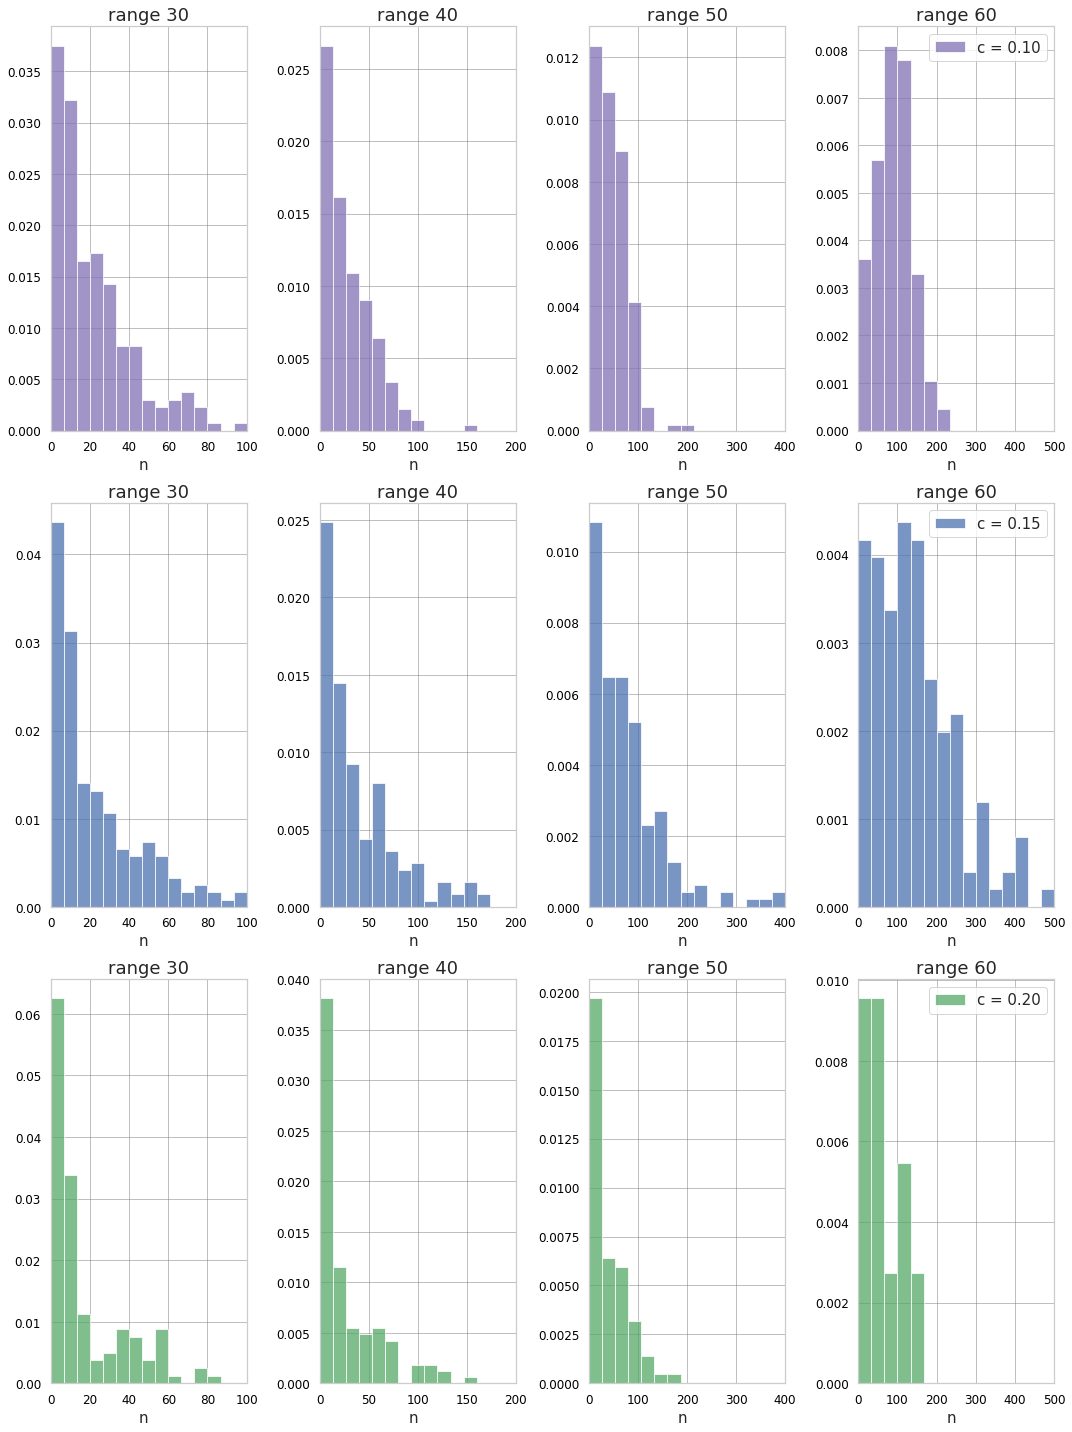

In [35]:
df_n100c10X50l03 = read_data('n50c10X50l03.csv') ;
df_n100c15X50l03 = read_data('n50c15X50l03.csv') ;
df_n100c20X50l03 = read_data('n50c20X50l03.csv') ;

multi_histogram(df_n100c10X50l03, df_n100c15X50l03, df_n100c20X50l03, 
                limit = [100,200, 400, 500],filename = 'df_n50X50l03.png')

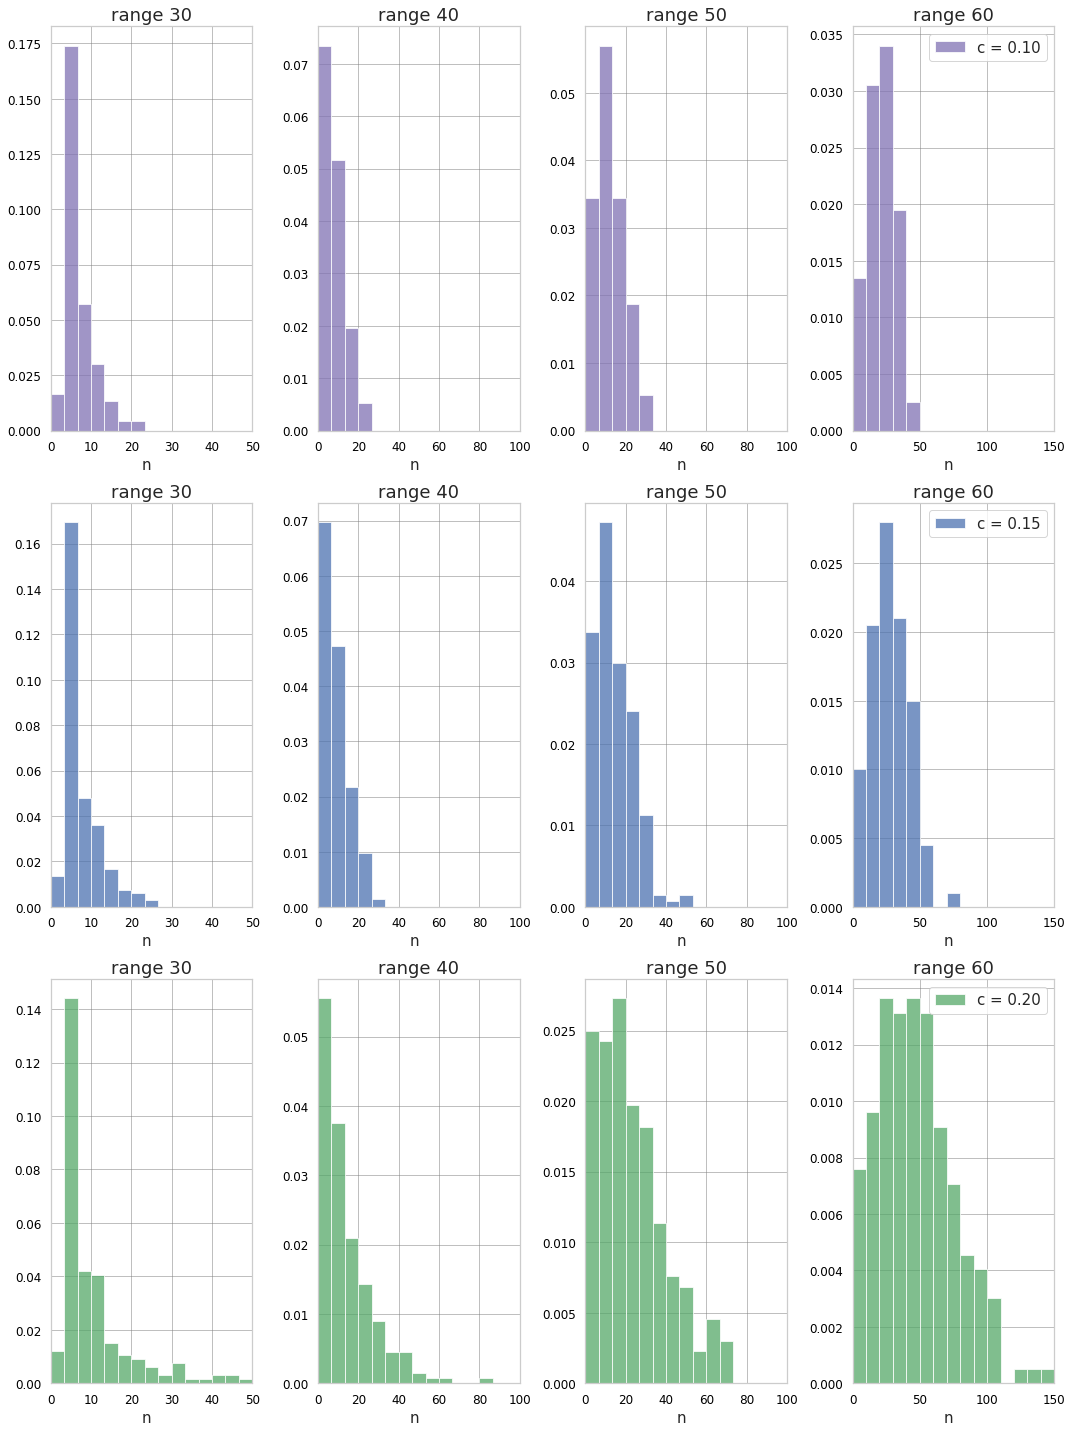

In [36]:
df_n100c10X50l1 = read_data('n50c10X50l1.csv') ;
df_n100c15X50l1 = read_data('n50c15X50l1.csv') ;
df_n100c20X50l1 = read_data('n50c20X50l1.csv') ;

multi_histogram(df_n100c10X50l1, df_n100c15X50l1, df_n100c20X50l1, 
                limit = [50,100,100,150], filename = 'df_n50X50l1.png')

#histogram(df_n100c10X50l1)
#histogram(df_n100c15X50l1)
#histogram(df_n100c20X50l1)

WARNING! Less than 200 samples in file: {:} n50c20X100l1.csv


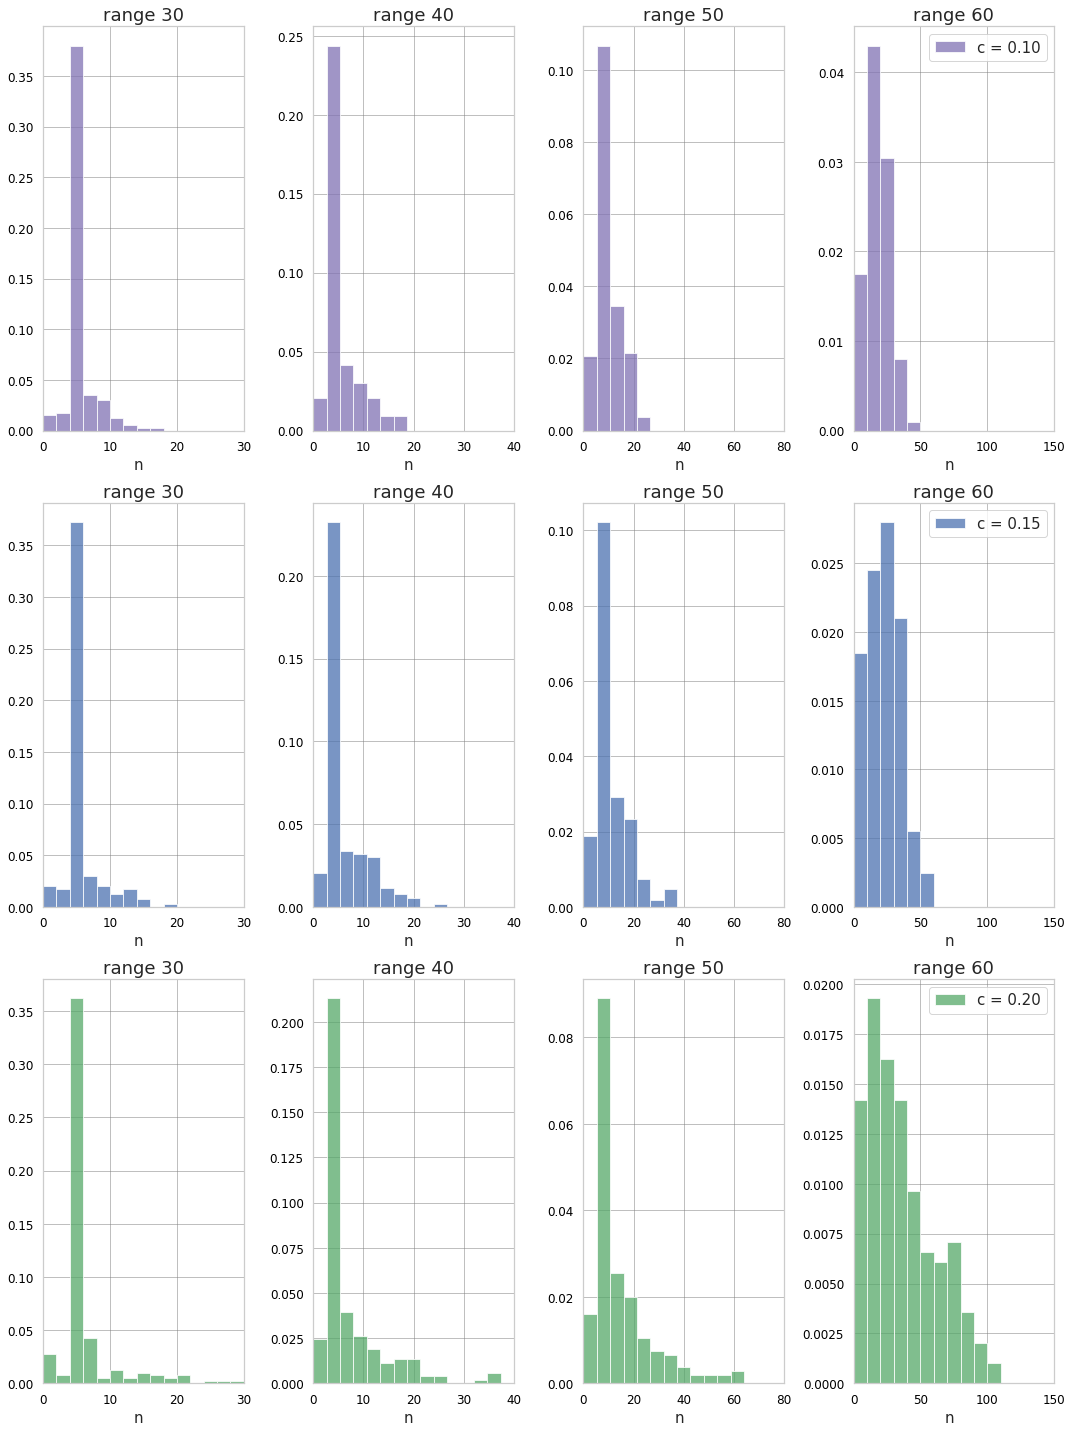

In [38]:
df_n100c10X100l1 = read_data('n50c10X100l1.csv') ;
df_n100c15X100l1 = read_data('n50c15X100l1.csv') ;
df_n100c20X100l1 = read_data('n50c20X100l1.csv') ;

multi_histogram(df_n100c10X100l1, df_n100c15X100l1, df_n100c20X100l1, 
                limit = [30,40,80,150], filename = 'df_n50X100l1.png')

WARNING! Less than 200 samples in file: {:} n50c15X100l03.csv
WARNING! Less than 200 samples in file: {:} n50c20X100l03.csv


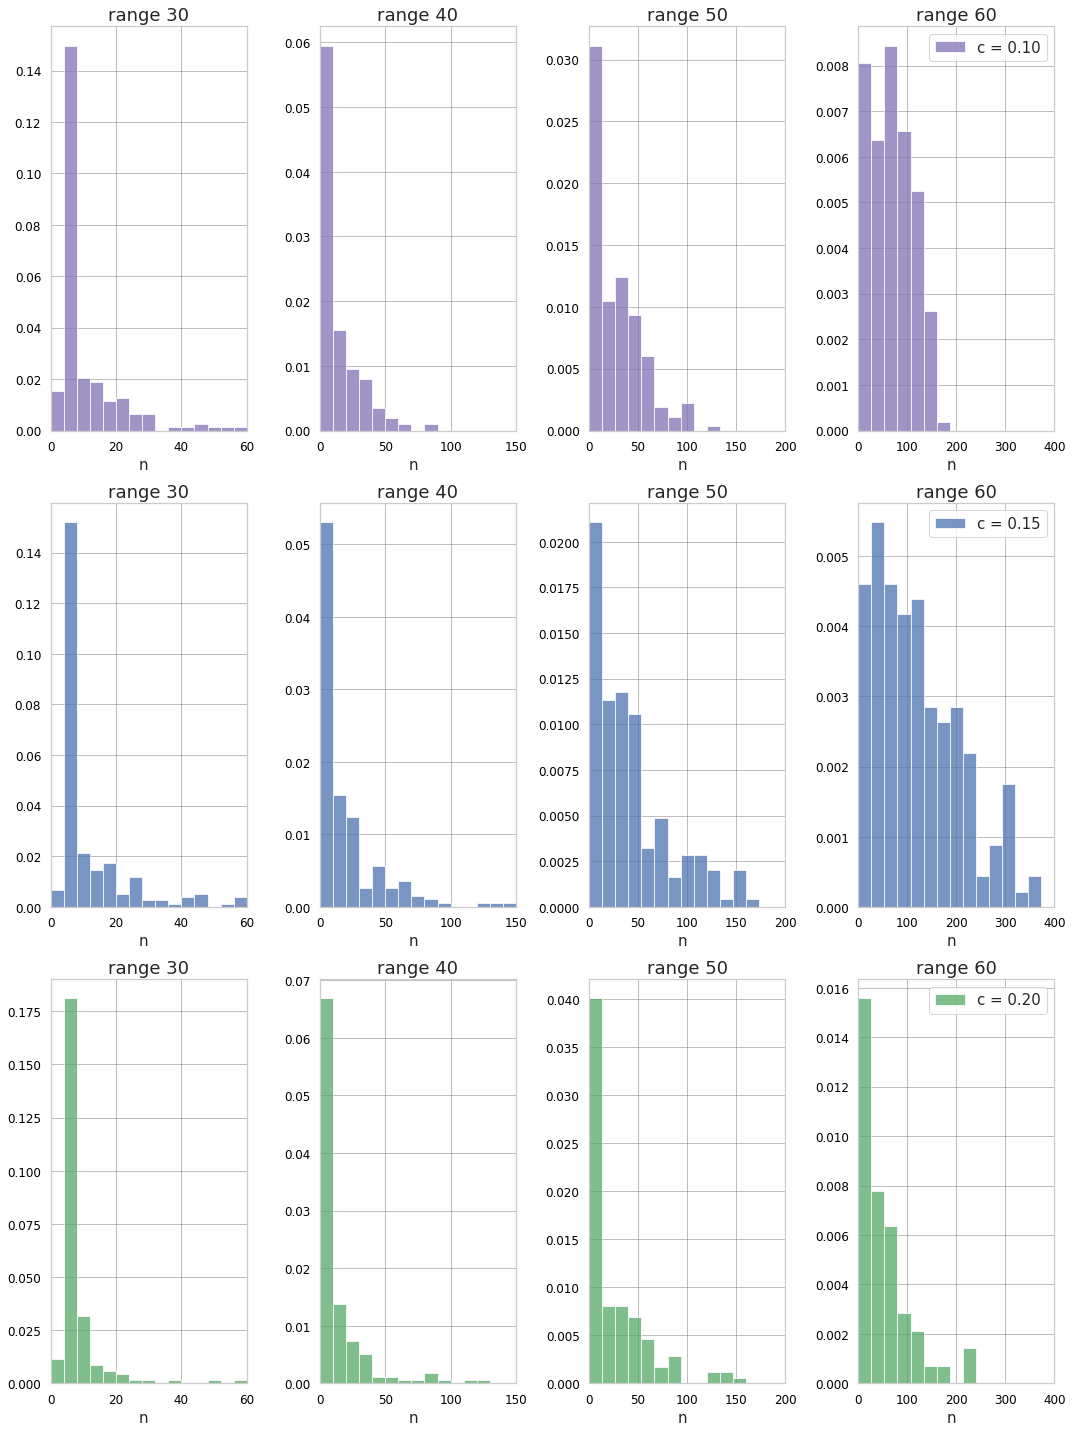

In [39]:
df_n100c10X100l03 = read_data('n50c10X100l03.csv') ;
df_n100c15X100l03 = read_data('n50c15X100l03.csv') ;
df_n100c20X100l03 = read_data('n50c20X100l03.csv') ;

multi_histogram(df_n100c10X100l03, df_n100c15X100l03, df_n100c20X100l03, 
                limit = [60,150,200,400], filename = 'df_n50X100l03.png')
